In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
file_path = "NetflixOriginals.csv"  # Sesuaikan dengan lokasi file Anda
data = pd.read_csv(file_path, encoding="latin1")

# Display informasi awal
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
None
             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japa

In [36]:
# Konversi 'Premiere' ke format datetime
data['Premiere'] = pd.to_datetime(data['Premiere'], errors='coerce')

# One-hot encoding untuk 'Genre' dan 'Language'
data_encoded = pd.get_dummies(data, columns=['Genre', 'Language'], drop_first=True)

# Memeriksa dataset hasil encoding
print(data_encoded.head())


             Title   Premiere  Runtime  IMDB Score  Genre_Action comedy  \
0  Enter the Anime 2019-08-05       58         2.5                False   
1      Dark Forces 2020-08-21       81         2.6                False   
2          The App 2019-12-26       79         2.6                False   
3   The Open House 2018-01-19       94         3.2                False   
4      Kaali Khuhi 2020-10-30       90         3.4                False   

   Genre_Action thriller  Genre_Action-adventure  Genre_Action-thriller  \
0                  False                   False                  False   
1                  False                   False                  False   
2                  False                   False                  False   
3                  False                   False                  False   
4                  False                   False                  False   

   Genre_Action/Comedy  Genre_Action/Science fiction  ...  \
0                False               

In [37]:
# Fitur dan target
X = data_encoded.drop(columns=['Title', 'Premiere', 'IMDB Score'])  # Drop kolom yang tidak diperlukan
y = data_encoded['IMDB Score']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}, X_test: {X_test.shape}")


Shape of X_train: (467, 152), X_test: (117, 152)


In [38]:
# Model pelatihan
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.9472904667734103


In [39]:
import joblib

# Simpan model
joblib.dump(model, "netflix_model.pkl")
print("Model saved as netflix_model.pkl")


Model saved as netflix_model.pkl


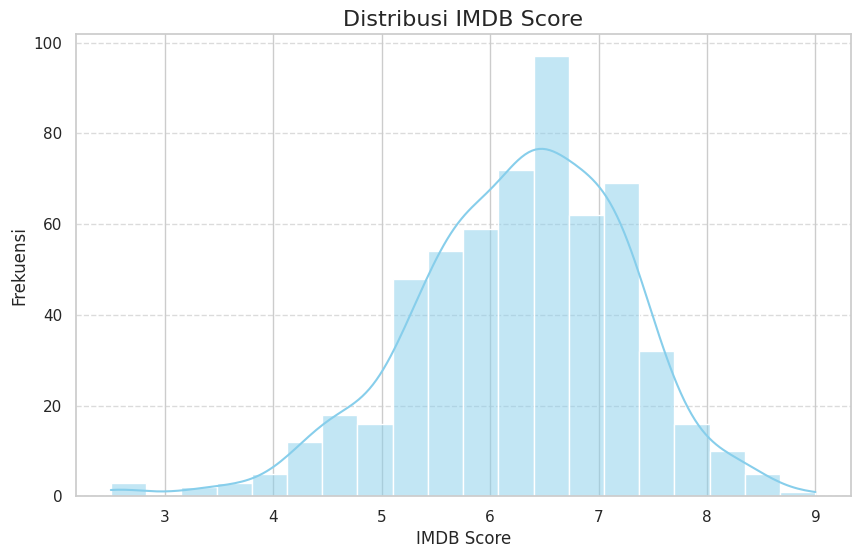

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("NetflixOriginals.csv", encoding="latin1")

# Konversi kolom 'Premiere' ke datetime untuk keperluan analisis waktu
data['Premiere'] = pd.to_datetime(data['Premiere'], errors='coerce')

# ===================================
# 1. Grafik Distribusi IMDB Score
# ===================================
plt.figure(figsize=(10, 6))
sns.histplot(data['IMDB Score'], bins=20, kde=True, color="skyblue")
plt.title("Distribusi IMDB Score", fontsize=16)
plt.xlabel("IMDB Score", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

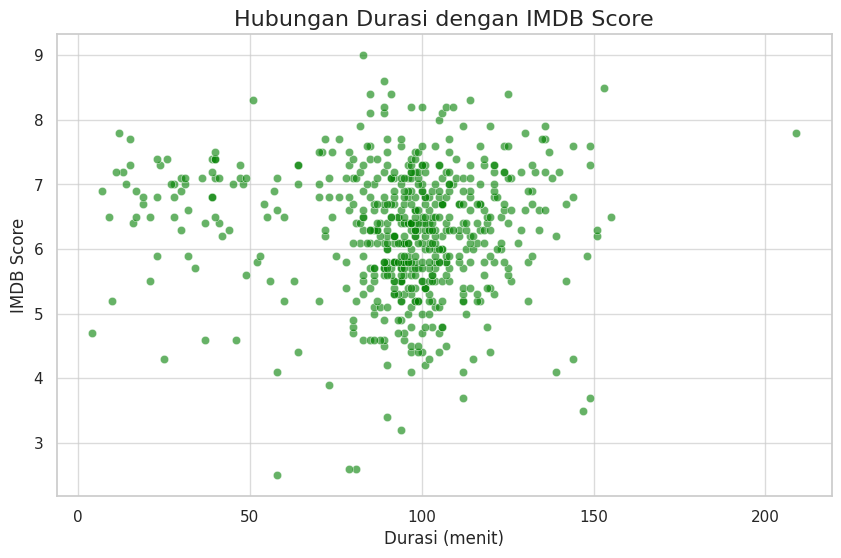

In [73]:
# ===================================
# 2. Grafik Durasi vs IMDB Score
# ===================================
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Runtime'], y=data['IMDB Score'], color="green", alpha=0.6)
plt.title("Hubungan Durasi dengan IMDB Score", fontsize=16)
plt.xlabel("Durasi (menit)", fontsize=12)
plt.ylabel("IMDB Score", fontsize=12)
plt.grid(alpha=0.7)
plt.show()

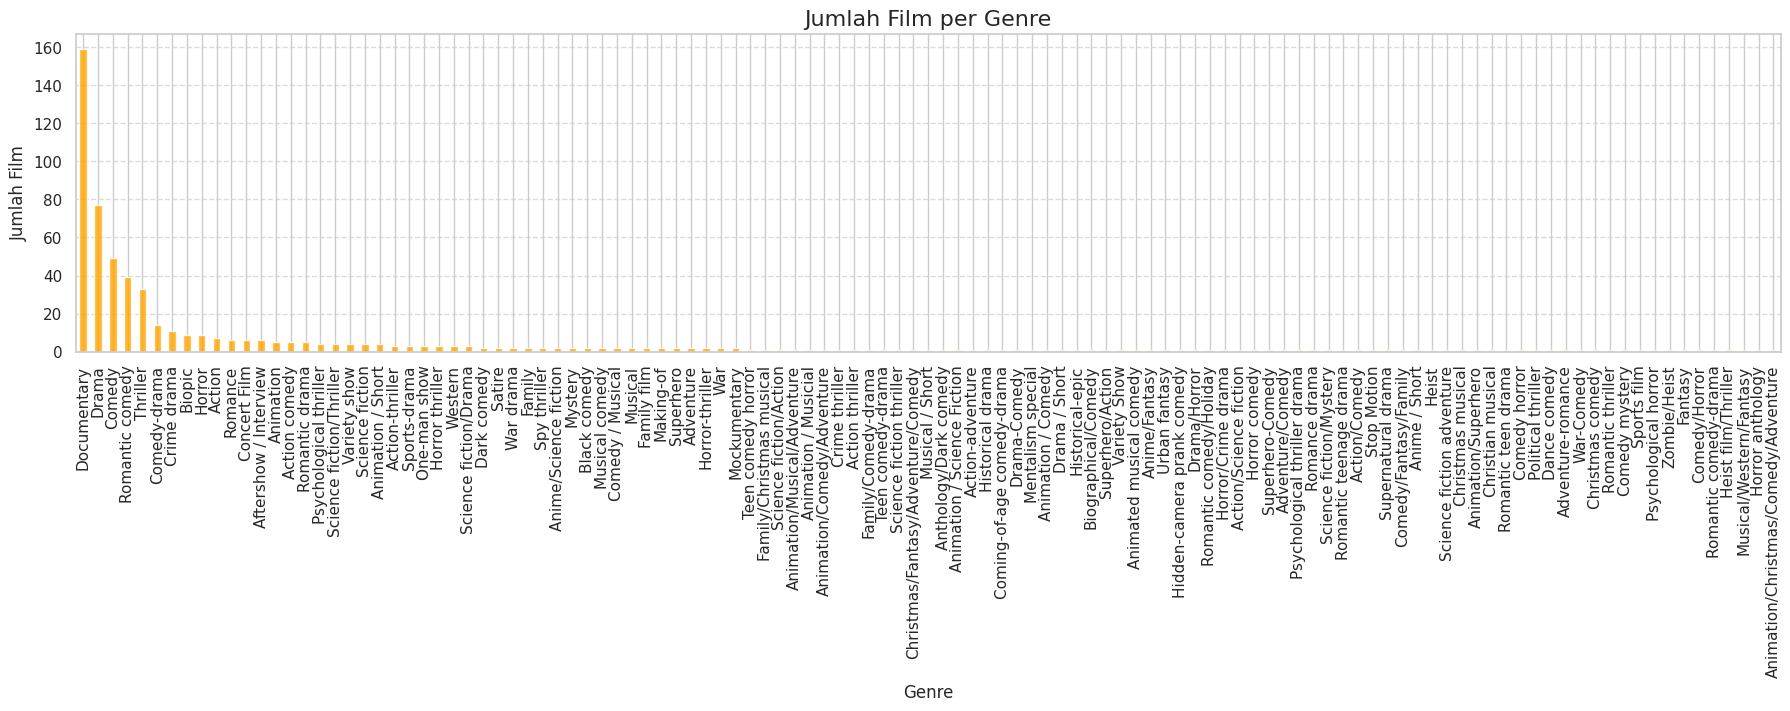

In [74]:
# ===================================
# 3. Jumlah Film per Genre
# ===================================
plt.figure(figsize=(22, 6))
genre_counts = data['Genre'].value_counts()
genre_counts.plot(kind='bar', color="orange", alpha=0.8)
plt.title("Jumlah Film per Genre", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Jumlah Film", fontsize=12)
plt.xticks(rotation=90, ha="center")  # Memutar label genre 90 derajat
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(bottom=0.35)  # Menambah ruang di bawah grafik untuk label
plt.show()

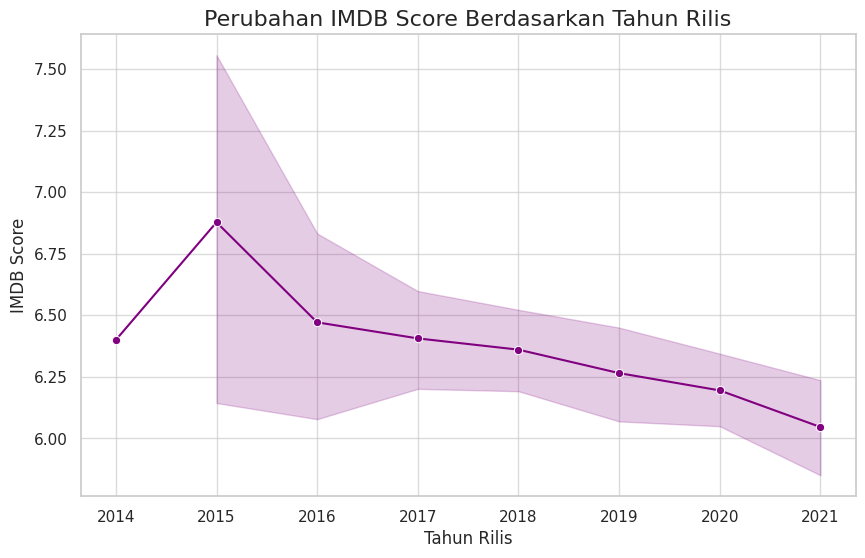

In [75]:
# ===================================
# 4. Perubahan IMDB Score Berdasarkan Tahun Rilis
# ===================================
data['Year'] = data['Premiere'].dt.year  # Ekstraksi tahun dari kolom Premiere
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='IMDB Score', marker="o", color="purple")
plt.title("Perubahan IMDB Score Berdasarkan Tahun Rilis", fontsize=16)
plt.xlabel("Tahun Rilis", fontsize=12)
plt.ylabel("IMDB Score", fontsize=12)
plt.grid(alpha=0.7)
plt.show()